In [ ]:
! pip install pyreadstat

In [ ]:
import pandas as pd

In [ ]:

df_spss_h = pd.read_spss("Koweps_h15_2020_beta1.sav")
df_spss_h.head()

In [ ]:
df_spss_p = pd.read_spss("Koweps_p15_2020_beta1.sav")
df_spss_p.head()

In [ ]:
df_h = df_spss_h.copy()
df_p = df_spss_p.copy()

In [ ]:
sexs = ['h1501_4','h1501_16', 'h1501_28', 'h1501_40','h1501_52', 'h1501_64', 'h1501_76','h1501_88','h1501_100']
birth_years = ['h1501_5','h1501_17', 'h1501_29', 'h1501_41', 'h1501_53', 'h1501_65', 'h1501_77','h1501_89','h1501_101']
marrieds = ['h1501_11','h1501_23','h1501_35', 'h1501_47', 'h1501_59', 'h1501_71', 'h1501_83','h1501_95','h1501_107']
job_types = ['h1503_8', 'h1503_18', 'h1503_28', 'h1503_38', 'h1503_48', 'h1503_58', 'h1503_68','h1503_78','h1503_88']

In [ ]:
#가구용 데이터 구조 확인
print(type(df_h), "\n")
print(df_h.shape, "\n")
print(df_h.info(), "\n")

In [ ]:
#가구원용 데이터 구조 확인
print(type(df_p), "\n")
print(df_p.shape, "\n")
print(df_p.info(), "\n")

In [ ]:
df_h[sexs].head()
df_h[birth_years].head()
df_h[marrieds].head()
df_h[job_types].head()


In [ ]:
sexs_data = df_h[sexs]
birth_years_data = df_h[birth_years]
marrieds_data = df_h[marrieds]
job_types_data = df_h[job_types]

In [ ]:
df_h_job = df_h[job_types]
type(df_h_job)
df_h_job

In [ ]:
#개인 패널 ID
h15_pid = ["h15_pid1",]
h15_pid= ["h15_pid"+str(i) for i in range(1,10)]
h15_pid
df_h[h15_pid]

In [ ]:
#성별ID
h15_pid=["h15_pid1",]
h15_pid=["h15_pid"+str(i) for i in range(1,10)]
h15_pid
pannel_ids = df_h[h15_pid]
pannel_ids[h15_pid[1]]

for aa in pannel_ids[h15_pid[1]]:
    print(aa)

In [35]:
cnt = len(h15_pid)
pannels = []
for i in range(cnt):
    for pid in pannel_ids[h15_pid[i]]:
        pannels.append(pid)
        
        
print(len(pannels))

54261


In [40]:
cnt = len(h15_pid)
pannels_list = []
sexs_lists = []
birth_years_lists = []
marrieds_lists = []
job_types_lists = []

for i in range(cnt):
    for data in pannel_ids[h15_pid[i]]:
        pannels_list.append(data)
        
    for data in sexs_data[sexs[i]]:
        sexs_lists.append(data)
        
    for data in birth_years_data[birth_years[i]]:
        birth_years_lists.append(data)
        
    for data in marrieds_data[marrieds[i]]:
        marrieds_lists.append(data)
        
    for data in job_types_data[job_types[i]]:
        job_types_lists.append(data)
        
print("pannels_list: ",len(pannels_list))
print("sexs list : ",len(sexs_lists))
print("birth_years_lists: ",len(birth_years_lists))
print("marrieds_list: ",len(marrieds_lists))
print("job_type_lists: ",len(job_types_lists))


pannels_list:  54261
sexs list :  54261
birth_years_lists:  54261
marrieds_list:  54261
job_type_lists:  54261


In [43]:
#데이터 프레임 생성
raw_data = {'pannel_id':pannels_list,'sex':sexs_lists,'birth_years':birth_years_lists,'married':marrieds_lists,'job_type':job_types_lists}
df = pd.DataFrame(raw_data)
df

,pannel_id,sex,birth_years,married,job_type
0,201.0,2.0,1945.0,2.0,NaN
1,301.0,1.0,1948.0,2.0,942.0
2,401.0,1.0,1942.0,3.0,762.0
3,601.0,1.0,1962.0,1.0,532.0
4,801.0,2.0,1940.0,2.0,999.0
...,...,...,...,...,...
54256,NaN,NaN,NaN,NaN,NaN
54257,NaN,NaN,NaN,NaN,NaN
54258,NaN,NaN,NaN,NaN,NaN
54259,NaN,NaN,NaN,NaN,NaN


In [48]:
col = ['h15_pid', 'p1502_8aq1', 'p1507_3aq5', 'p1504_5', 'p1505_2', 'p1505_3']
df_p_sel = df_p[col]
#컬럼명 변경
df_p_sel.rename(columns = {'h15_pid' : 'pannel_id',
'p1502_8aq1' : 'salary',
'p1507_3aq5' : 'major',
'p1504_5' : 'donation',
'p1505_2' : 'drink_qty',
'p1505_3' : 'drink_freq'
}, inplace=True)
df_p_sel

,pannel_id,salary,major,donation,drink_qty,drink_freq
0,201.0,NaN,NaN,NaN,5.0,NaN
1,301.0,167.0,NaN,NaN,5.0,NaN
2,401.0,78.0,NaN,NaN,5.0,NaN
3,601.0,NaN,NaN,NaN,5.0,NaN
4,602.0,NaN,NaN,12.0,5.0,NaN
...,...,...,...,...,...,...
11452,980002.0,NaN,NaN,NaN,5.0,NaN
11453,980003.0,NaN,NaN,NaN,5.0,NaN
11454,980004.0,89.0,NaN,NaN,5.0,NaN
11455,980005.0,184.0,NaN,NaN,5.0,NaN


In [53]:
#가구용과 가구원용 합치기
df = df.sort_values("pannel_id")
#pannel_id를 인덱스로 둠
df1 = df.set_index("pannel_id")
df1


,sex,birth_years,married,job_type
pannel_id,,,,
201.0,2.0,1945.0,2.0,NaN
301.0,1.0,1948.0,2.0,942.0
401.0,1.0,1942.0,3.0,762.0
601.0,1.0,1962.0,1.0,532.0
602.0,2.0,1963.0,1.0,NaN
...,...,...,...,...
NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN


In [54]:
df_p_sel = df_p_sel.sort_values("pannel_id")
df2 = df_p_sel.set_index("pannel_id")
df2

,salary,major,donation,drink_qty,drink_freq
pannel_id,,,,,
201.0,NaN,NaN,NaN,5.0,NaN
301.0,167.0,NaN,NaN,5.0,NaN
401.0,78.0,NaN,NaN,5.0,NaN
601.0,NaN,NaN,NaN,5.0,NaN
602.0,NaN,NaN,12.0,5.0,NaN
...,...,...,...,...,...
980002.0,NaN,NaN,NaN,5.0,NaN
980003.0,NaN,NaN,NaN,5.0,NaN
980004.0,89.0,NaN,NaN,5.0,NaN


In [55]:
df.head(10), "------",df_p_sel.head(10)

(       pannel_id  sex  birth_years  married  job_type
 0          201.0  2.0       1945.0      2.0       NaN
 1          301.0  1.0       1948.0      2.0     942.0
 2          401.0  1.0       1942.0      3.0     762.0
 3          601.0  1.0       1962.0      1.0     532.0
 6032       602.0  2.0       1963.0      1.0       NaN
 12061      603.0  2.0       2003.0      0.0       NaN
 18090      604.0  1.0       1927.0      1.0       NaN
 24119      605.0  2.0       1934.0      1.0     941.0
 4          801.0  2.0       1940.0      2.0     999.0
 5         1001.0  2.0       1970.0      3.0       NaN,
 '------',
    pannel_id  salary  major  donation  drink_qty  drink_freq
 0      201.0     NaN    NaN       NaN        5.0         NaN
 1      301.0   167.0    NaN       NaN        5.0         NaN
 2      401.0    78.0    NaN       NaN        5.0         NaN
 3      601.0     NaN    NaN       NaN        5.0         NaN
 4      602.0     NaN    NaN      12.0        5.0         NaN
 5      604

In [57]:
#합치기
df = []
df
df = pd.concat([df1,df2],axis = 1)
df.head(10)

,sex,birth_years,married,job_type,salary,major,donation,drink_qty,drink_freq
pannel_id,,,,,,,,,
201.0,2.0,1945.0,2.0,NaN,NaN,NaN,NaN,5.0,NaN
301.0,1.0,1948.0,2.0,942.0,167.0,NaN,NaN,5.0,NaN
401.0,1.0,1942.0,3.0,762.0,78.0,NaN,NaN,5.0,NaN
601.0,1.0,1962.0,1.0,532.0,NaN,NaN,NaN,5.0,NaN
602.0,2.0,1963.0,1.0,NaN,NaN,NaN,12.0,5.0,NaN
603.0,2.0,2003.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
604.0,1.0,1927.0,1.0,NaN,NaN,NaN,NaN,5.0,NaN
605.0,2.0,1934.0,1.0,941.0,27.0,NaN,NaN,5.0,NaN
801.0,2.0,1940.0,2.0,999.0,27.0,NaN,NaN,5.0,NaN


In [58]:
df.to_excel('survey15.xlsx')

In [68]:
#남녀 월급 차이 있을까?
df = pd.read_excel('survey15.xlsx')
df.head()

,pannel_id,sex,birth_years,married,job_type,salary,major,donation,drink_qty,drink_freq
0,201,2,1945,2,NaN,NaN,NaN,NaN,5.0,NaN
1,301,1,1948,2,942.0,167.0,NaN,NaN,5.0,NaN
2,401,1,1942,3,762.0,78.0,NaN,NaN,5.0,NaN
3,601,1,1962,1,532.0,NaN,NaN,NaN,5.0,NaN
4,602,2,1963,1,NaN,NaN,NaN,12.0,5.0,NaN


In [69]:
#성별 변수 검토
df['sex'].values
df['sex'].value_counts()

2    7383
1    6077
Name: sex, dtype: int64

In [70]:
len(df['sex']),df['sex'].isnull().sum()

(13460, 0)

In [71]:
df['sex']=df['sex'].map({1:'남자',2:'여자'},na_action=None)
df.head()

,pannel_id,sex,birth_years,married,job_type,salary,major,donation,drink_qty,drink_freq
0,201,여자,1945,2,NaN,NaN,NaN,NaN,5.0,NaN
1,301,남자,1948,2,942.0,167.0,NaN,NaN,5.0,NaN
2,401,남자,1942,3,762.0,78.0,NaN,NaN,5.0,NaN
3,601,남자,1962,1,532.0,NaN,NaN,NaN,5.0,NaN
4,602,여자,1963,1,NaN,NaN,NaN,12.0,5.0,NaN


In [72]:
df['salary'].describe()


count    4487.000000
mean      271.556274
std       200.484282
min         0.000000
25%       150.000000
50%       230.000000
75%       350.000000
max      2167.000000
Name: salary, dtype: float64

In [73]:
df['salary'].isnull().sum()

8973

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

Text(0.5, 1.0, '월급')

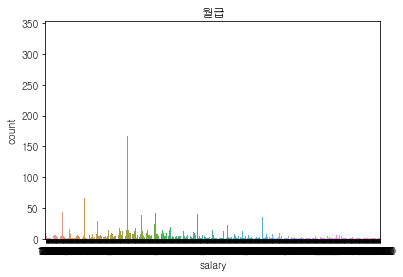

In [78]:
ax = plt.subplots()
ax = sns.countplot(x="salary", data=df)
plt.title("월급")
plt.show()

In [79]:
df['salary'].describe()

count    4487.000000
mean      271.556274
std       200.484282
min         0.000000
25%       150.000000
50%       230.000000
75%       350.000000
max      2167.000000
Name: salary, dtype: float64

In [80]:
bins = list(range(0,2201,100))
bins

[0,
 100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 1100,
 1200,
 1300,
 1400,
 1500,
 1600,
 1700,
 1800,
 1900,
 2000,
 2100,
 2200]

In [86]:
len(bins)

23

In [81]:
bins_labels = [str(x)+"미만" for x in bins[1:]]
bins_labels

['100미만',
 '200미만',
 '300미만',
 '400미만',
 '500미만',
 '600미만',
 '700미만',
 '800미만',
 '900미만',
 '1000미만',
 '1100미만',
 '1200미만',
 '1300미만',
 '1400미만',
 '1500미만',
 '1600미만',
 '1700미만',
 '1800미만',
 '1900미만',
 '2000미만',
 '2100미만',
 '2200미만']

In [83]:
df['salary_bin'] = pd.cut(df['salary'],bins,right=False,labels=bins_labels[:])
df

,pannel_id,sex,birth_years,married,job_type,salary,major,donation,drink_qty,drink_freq,salary_bin
0,201,여자,1945,2,NaN,NaN,NaN,NaN,5.0,NaN,NaN
1,301,남자,1948,2,942.0,167.0,NaN,NaN,5.0,NaN,200미만
2,401,남자,1942,3,762.0,78.0,NaN,NaN,5.0,NaN,100미만
3,601,남자,1962,1,532.0,NaN,NaN,NaN,5.0,NaN,NaN
4,602,여자,1963,1,NaN,NaN,NaN,12.0,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13455,980002,여자,1967,1,NaN,NaN,NaN,NaN,5.0,NaN,NaN
13456,980003,여자,1992,5,NaN,NaN,NaN,NaN,5.0,NaN,NaN
13457,980004,남자,1995,5,999.0,89.0,NaN,NaN,5.0,NaN,100미만
13458,980005,여자,1998,5,246.0,184.0,NaN,NaN,5.0,NaN,200미만


In [84]:
df[['salary','salary_bin']]

,salary,salary_bin
0,NaN,NaN
1,167.0,200미만
2,78.0,100미만
3,NaN,NaN
4,NaN,NaN
...,...,...
13455,NaN,NaN
13456,NaN,NaN
13457,89.0,100미만
13458,184.0,200미만


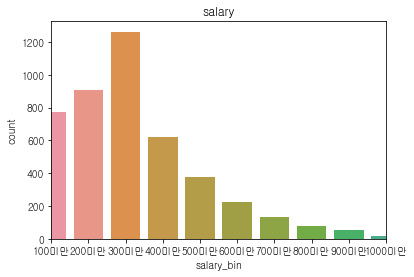

In [87]:
ax = plt.subplots()
ax = sns.countplot(x="salary_bin", data=df)
plt.title("salary")
# plt.ylim(0,600)
plt.xlim(0,9)
plt.show()

In [89]:
df['salary'].isin([9999]) # 유무 True, False 결과
if (df['salary'] == 9999).any():
    print("있음")
else:
    print("없음")

없음


In [90]:
sex_salary= df.groupby('sex')['salary'].agg(**{'salary_mean':'mean','salary_median':'median'}).reset_index()
sex_salary

,sex,salary_mean,salary_median
0,남자,352.257965,310.0
1,여자,189.658734,188.0


In [96]:
#남자의 평균월급 / 여자의 평균월급
round(sex_salary.loc[0,"salary_mean"]/sex_salary.loc[1,"salary_mean"],2)

1.86

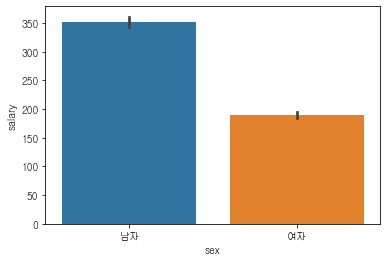

In [97]:
df = df.sort_values(by='sex')
sns.barplot(data= df,x="sex",y="salary")
plt.show()

In [118]:
from matplotlib import font_manager, rc
# font_path = "./한글폰트.ttf" # 폰트 파일 위치
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50668 missing from current fon

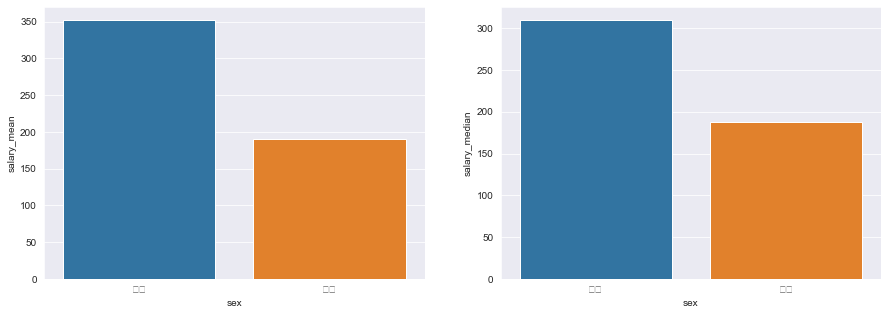

In [119]:
df = df.sort_values(by='sex')
sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,5))
a1 = fig.add_subplot(1,2,1)
a2 = fig.add_subplot(1,2,2)
sns.barplot(data = sex_salary,x="sex",y= "salary_mean",ax = a1)
sns.barplot(data = sex_salary, x = "sex",y = "salary_median",ax = a2)
plt.show()

In [108]:
df['birth_years'].values
df['birth_years'].value_counts()
df['birth_years'].describe()

count    13460.000000
mean      1969.469316
std         24.393833
min       1907.000000
25%       1948.000000
50%       1967.000000
75%       1990.000000
max       2019.000000
Name: birth_years, dtype: float64

In [109]:
#데이터 개수 및 null값 확인
len(df['birth_years']),df['birth_years'].isnull().sum()

(13460, 0)

In [110]:
#연도로 나이 계산
df['old'] = [2021-y+1 for y in df['birth_years']]


In [111]:
df[['birth_years','old']]

,birth_years,old
6729,1938,84
11202,2000,22
12836,1931,91
7132,1979,43
7130,1946,76
...,...,...
2528,1963,59
7659,1994,28
7658,1966,56
2511,1978,44


In [112]:
df['salary'].describe()

count    4487.000000
mean      271.556274
std       200.484282
min         0.000000
25%       150.000000
50%       230.000000
75%       350.000000
max      2167.000000
Name: salary, dtype: float64

In [113]:
df['salary'].isnull().sum()

8973

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0, flags=flags)


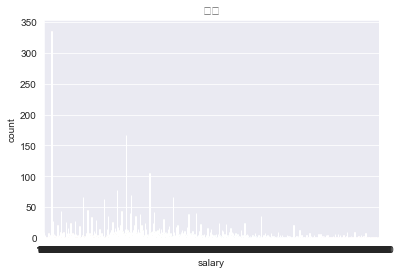

In [120]:
# countplot : 각 카테고리 값별로 데이터가 얼마나 있는지 표시
ax = plt.subplots()
ax = sns.countplot(x = 'salary',data = df)
plt.title("월급")
plt.show()